In [6]:
from fraud import collectAllFeaturesBaseline
from fraud import calculate_mutual_information, visualize_mutual_information

df_fraud_aggregated = collectAllFeaturesBaseline() 

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:58: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


           client_id  target  disrict  region  client_catg
0     train_Client_0     0.0       60     101           11
1     train_Client_1     0.0       69     107           11
2    train_Client_10     0.0       62     301           11
3   train_Client_100     0.0       69     105           11
4  train_Client_1000     0.0       62     303           11


/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/fraud.py:683: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merge_df['creation_date'] = pd.to_datetime(merge_df['creation_date'])


In [7]:
#df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target", 'region', 'disrict', 'client_catg'])
df_fraud_mutual_info = calculate_mutual_information(df_fraud_aggregated, target_col="target", exclude_cols=["client_id", "target"])

In [ ]:
df_fraud_mutual_info.head(50)# save # saaaaaassssss


,Feature,MI_Score
0,f_t_client_catg_target_mean,0.035566
1,client_catg,0.029302
2,tarif_type,0.017382
3,f_total_consumption_max,0.010463
4,f_client_tenure_days,0.010072
5,f_index_diff_max,0.009786
6,f_total_consumption_std,0.009612
7,f_index_diff_std,0.009603
8,f_counter_statue_error_occured,0.009154
9,disrict,0.009002


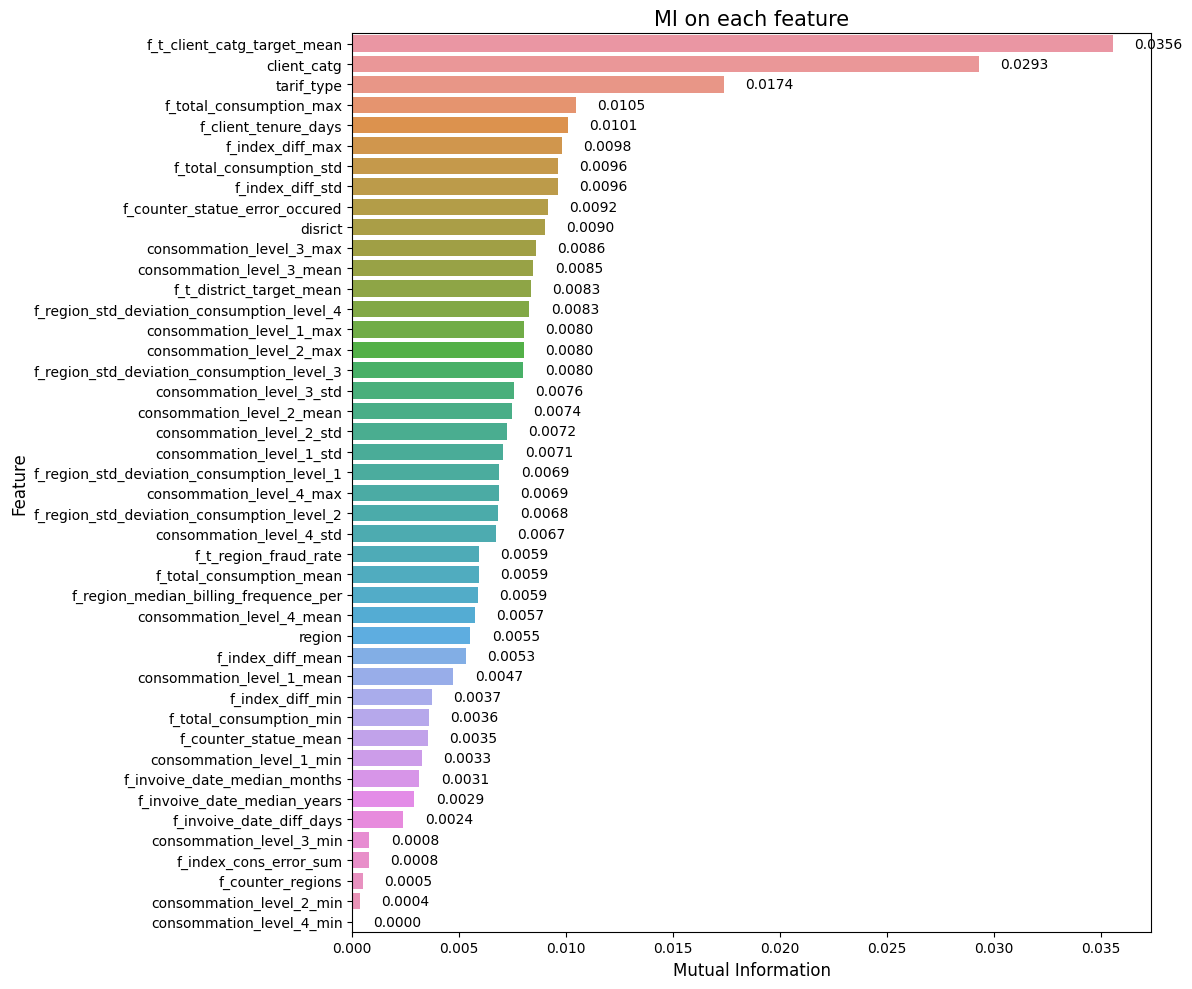

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
visualize_mutual_information(df_fraud_mutual_info, top_n=100)

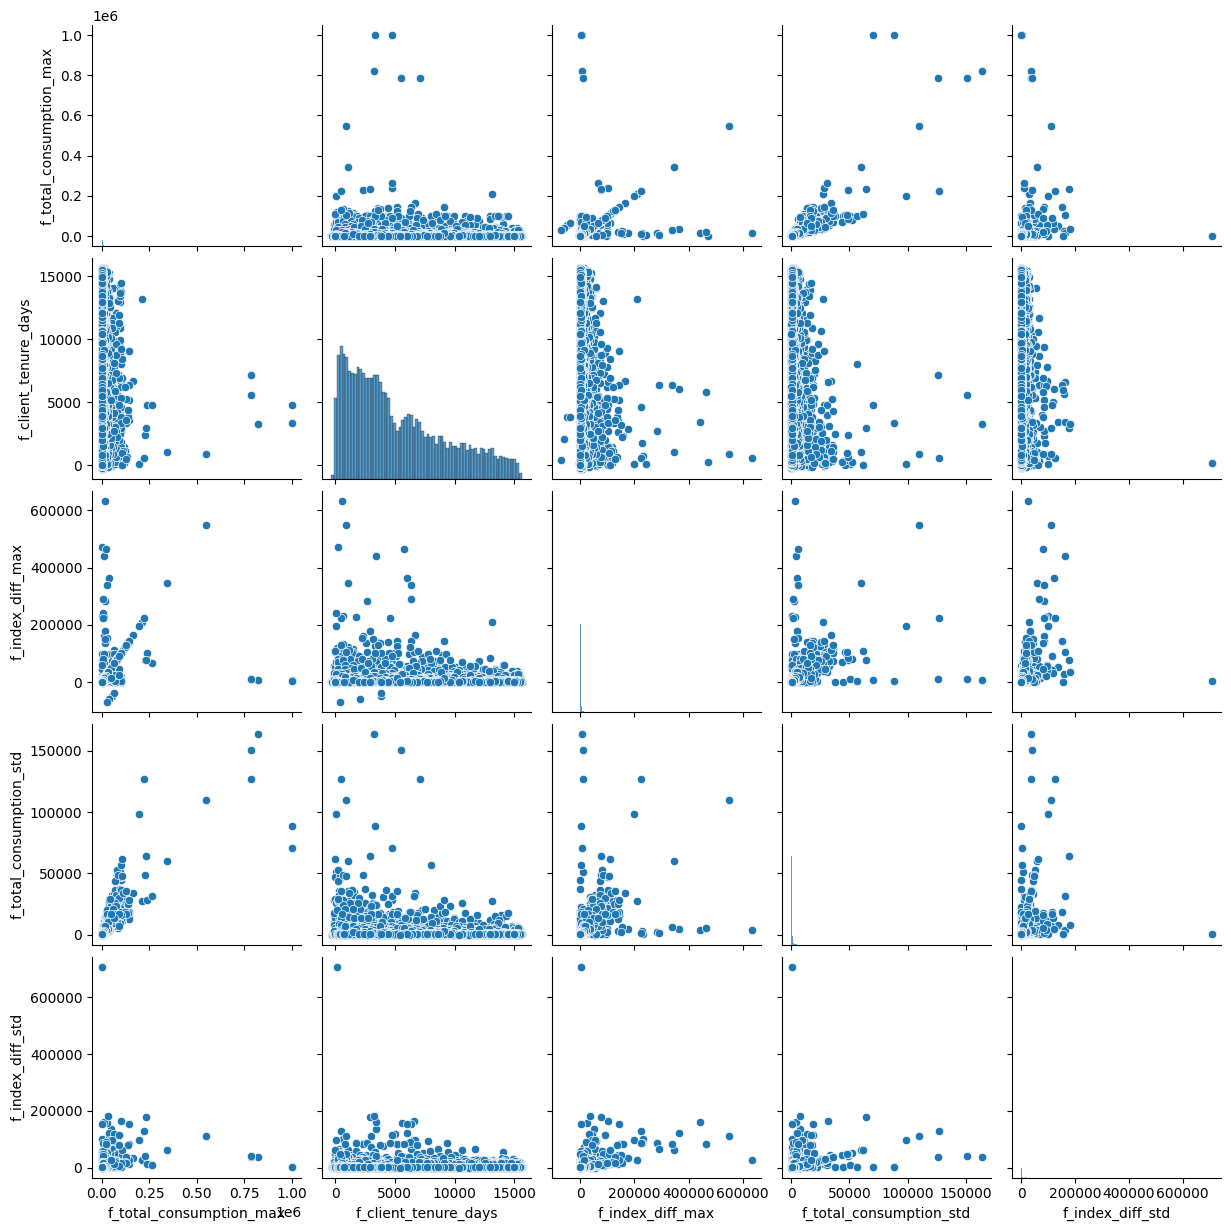

In [10]:
import seaborn as sns

selected = ['f_total_consumption_max', 'f_client_tenure_days', 'f_index_diff_max', 'f_total_consumption_std', 'f_index_diff_std']

# Neues DataFrame mit einer echten Kopie dieser Spalten
df_selected = df_fraud_aggregated[selected].copy()

# Heatmap
#corr = df_fraud_aggregated.corr()
#sns.heatmap(corr, annot=True, cmap='coolwarm')

# Scatter-Matrix (Pairplot)
sns.pairplot(df_selected.select_dtypes(include='number'))